### El objetivo es analizar los parametros de altura y peso de un dataset para evaluar su distribucion entre hombres y mujeres y hacer un algoritmo entrenado para predecir si una variable de peso y altura es un hombre o una mujer

#### en el dataset hombre = 1 y mujer = 0

## Importacion de librerias

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

## Importamos dataset

In [2]:
data = pd.read_csv('../Dataset/data_new.csv')
data.head()

,Unnamed: 0,Altura,Peso,Sexo
0,0,183.807681,87.756227,1
1,1,186.880711,96.781892,1
2,2,184.081405,102.937333,1
3,3,152.812776,42.404549,0
4,4,170.262159,84.806860,1


#### se creo una columna indeseada, la desechamos

In [3]:
 data = data.drop(['Unnamed: 0'], axis = 1)
 data.head()

,Altura,Peso,Sexo
0,183.807681,87.756227,1
1,186.880711,96.781892,1
2,184.081405,102.937333,1
3,152.812776,42.404549,0
4,170.262159,84.806860,1


## Hacemos algunas graficas y evaluaciones sobre el dataset

In [4]:
data.describe()

,Altura,Peso,Sexo
count,10000.000000,10000.000000,10000.000000
mean,168.573602,72.648161,0.500000
std,9.772721,14.448798,0.500025
min,137.828359,29.115057,0.000000
25%,161.304276,61.118123,0.000000
50%,168.447898,72.545817,0.500000
75%,175.702625,84.226286,1.000000
max,200.656806,121.495364,1.000000


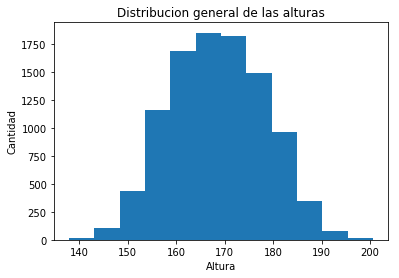

In [5]:
plt.hist(data['Altura'], bins= 12)
plt.xlabel('Altura')
plt.ylabel('Cantidad')
plt.title("Distribucion general de las alturas")
plt.show()

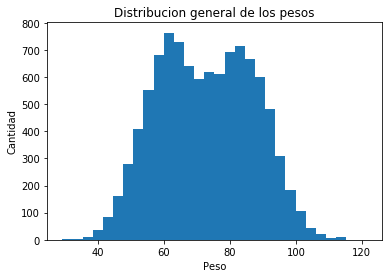

In [6]:
plt.hist(data['Peso'], bins= 30)
plt.xlabel('Peso')
plt.ylabel('Cantidad')
plt.title("Distribucion general de los pesos")
plt.show()

##### En el grafico anterior se ve que la imagen no es perfectamente acampanada, esto se debe a que se estan considerando hombres y mujeres en el mismo grafico

### Ahora hacemos histograma diferenciando los sexos

In [20]:
mujer = data[data['Sexo'] == 0]
hombre = data[data['Sexo'] == 1]

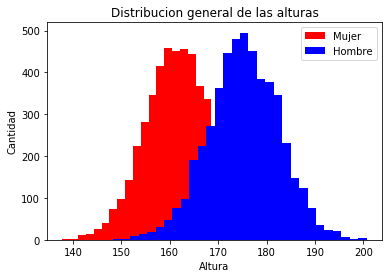

In [31]:
plt.hist(mujer['Altura'], bins= 30, color= 'red', label= 'Mujer')
plt.hist(hombre['Altura'], bins= 30, color= 'blue', label= 'Hombre')
plt.xlabel('Altura')
plt.ylabel('Cantidad')
plt.title("Distribucion general de las alturas")
plt.legend(loc= 'upper right')
plt.show()

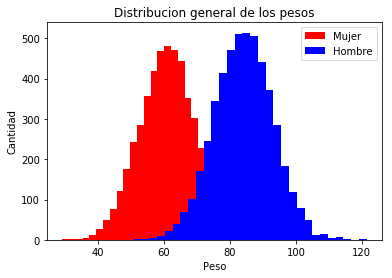

In [25]:
plt.hist(mujer['Peso'], bins= 30, color= 'red', label= 'Mujer')
plt.hist(hombre['Peso'], bins= 30, color= 'blue', label= 'Hombre')
plt.xlabel('Peso')
plt.ylabel('Cantidad')
plt.title("Distribucion general de los pesos")
plt.legend(loc= 'upper right')
plt.show()

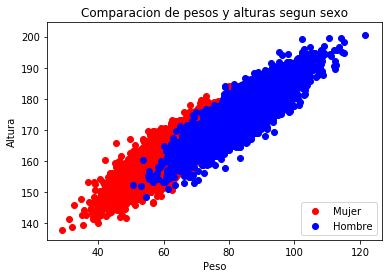

In [65]:
plt.scatter(mujer["Peso"], mujer['Altura'], color= "red", label= "Mujer")
plt.scatter(hombre["Peso"], hombre['Altura'], color= "blue", label= "Hombre")
plt.title("Comparacion de pesos y alturas segun sexo")
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.legend(loc= "lower right")
plt.show()

#### Desarrollaremos un algoritmo de regresion logistica para predecir a traves del peso y altura, el sexo de la persona y evaluaremos su rendimiento|

In [32]:
feature_cols = ['Peso', 'Altura']
x = data[feature_cols]
y = data["Sexo"]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0)

In [45]:
lm = LogisticRegression()
lm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
lm.intercept_

array([-0.00357051])

In [47]:
lm.coef_

array([[ 0.43190948, -0.1860028 ]])

In [48]:
lm.score(x_train, y_train)

0.9195714285714286

In [54]:
prediccion = lm.predict(x_test)
print(prediccion)

[0 1 1 ... 1 1 1]


In [55]:
res = pd.DataFrame({'Prediccion': prediccion, 'Real': y_test})

In [57]:
res.head(100)

,Prediccion,Real
9394,0,0
898,1,1
2398,1,1
5906,0,0
2343,1,1
8225,0,0
5506,0,0
6451,0,0
2670,0,1
3497,0,0


In [58]:
confussion_matrix = pd.crosstab(res['Prediccion'], res['Real'])
confussion_matrix

Real,0,1
Prediccion,,
0,1403,120
1,122,1355


### A pesar de la observacion anterior, el algoritmo obtuvo una puntuacion de 0.91 y erro 242 instancias de 1000 en total